#Importing libraries & dataset

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
plt.rcParams['figure.figsize'] = (4, 4)
pd.set_option('display.float_format', '{:.2f}'.format)

In [434]:
df = pd.read_csv('Dataset.csv')

# Data Profiling

In [435]:
df.head()

,Student_ID,Age,Gender,Ethnicity,Marital_Status,High_School_GPA,SAT_Score,Activities,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Study_Abroad,Certifications,Soft_Skills_Score,Networking_Score,Languages_Spoken,Linkedin_Verified,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Job_is_Related_to_Study,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,White,Single,3.58,1052,Clubs,291,3.96,Arts,3,7,No,2,9,8,1,No,5,27200,4,5,Entry,No,7,No
1,S00002,21,Other,White,Single,2.52,1211,Clubs,112,3.63,Law,4,7,No,3,8,1,1,No,4,25000,1,1,Mid,Yes,7,No
2,S00003,28,Female,White,Single,3.42,1193,Arts,715,2.63,Medicine,4,8,Yes,1,1,9,1,Yes,0,42400,9,3,Entry,Yes,7,No
3,S00004,25,Male,White,Married,2.43,1497,Arts,170,2.81,Computer Science,3,9,Yes,1,10,6,1,Yes,1,57400,7,5,Mid,No,5,No
4,S00005,22,Male,White,Single,2.08,1012,Athletics,599,2.48,Engineering,4,6,Yes,4,10,9,1,Yes,4,47600,9,5,Entry,Yes,2,No


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Ethnicity                5000 non-null   object 
 4   Marital_Status           5000 non-null   object 
 5   High_School_GPA          5000 non-null   float64
 6   SAT_Score                5000 non-null   int64  
 7   Activities               5000 non-null   object 
 8   University_Ranking       5000 non-null   int64  
 9   University_GPA           5000 non-null   float64
 10  Field_of_Study           5000 non-null   object 
 11  Internships_Completed    5000 non-null   int64  
 12  Projects_Completed       5000 non-null   int64  
 13  Study_Abroad             5000 non-null   object 
 14  Certifications          

In [437]:
print(df.duplicated().sum())

0


In [438]:
df['Student_ID'].nunique()

5000

In [439]:
df.drop(columns=['Student_ID'], inplace=True)

In [440]:
df.select_dtypes('number').skew()

,0
Age,0.02
High_School_GPA,0.01
SAT_Score,-0.02
University_Ranking,-0.00
University_GPA,-0.04
Internships_Completed,0.02
Projects_Completed,-0.01
Certifications,-0.01
Soft_Skills_Score,-0.02
Networking_Score,-0.02


In [441]:
for col in list(df.select_dtypes('object')):
  print(df[col].unique())
  print('-'*75)

['Male' 'Other' 'Female']
---------------------------------------------------------------------------
['White' 'African American' 'Hispanic' 'Others' 'Asian' 'Native American']
---------------------------------------------------------------------------
['Single' 'Married']
---------------------------------------------------------------------------
['Clubs' 'Arts' 'Athletics' 'Academic' 'Others']
---------------------------------------------------------------------------
['Arts' 'Law' 'Medicine' 'Computer Science' 'Engineering' 'Business'
 'Mathematics']
---------------------------------------------------------------------------
['No' 'Yes']
---------------------------------------------------------------------------
['1' '2' '3' '4+']
---------------------------------------------------------------------------
['No' 'Yes']
---------------------------------------------------------------------------
['Entry' 'Mid' 'Senior' 'Executive']
------------------------------------------------------

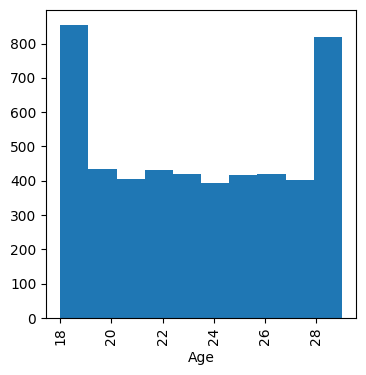

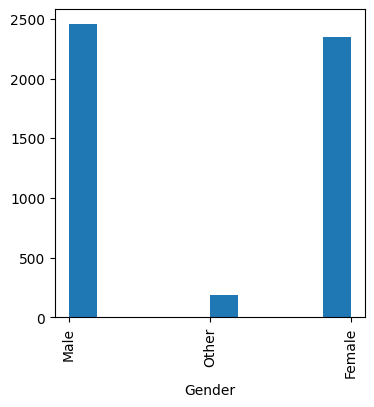

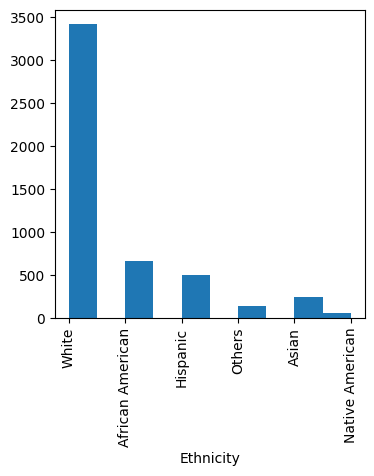

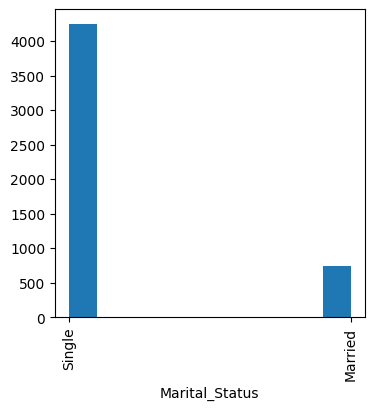

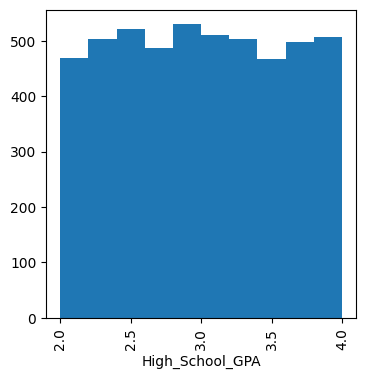

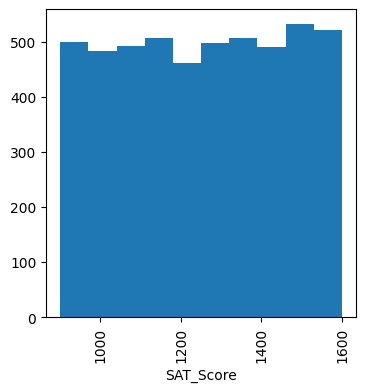

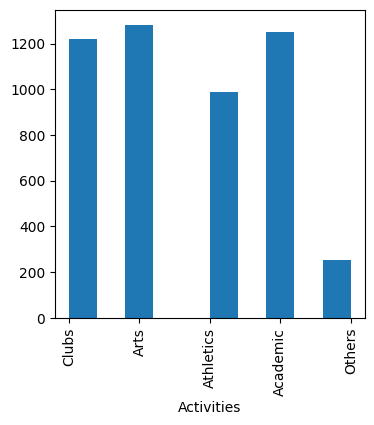

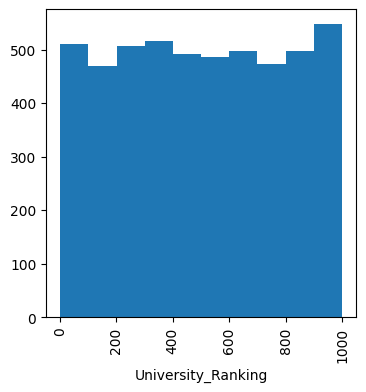

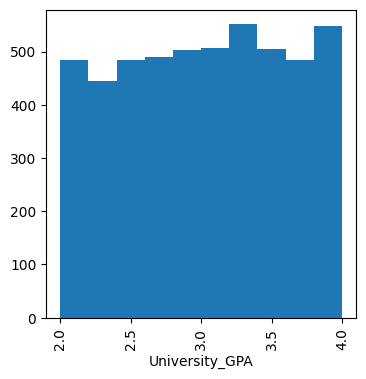

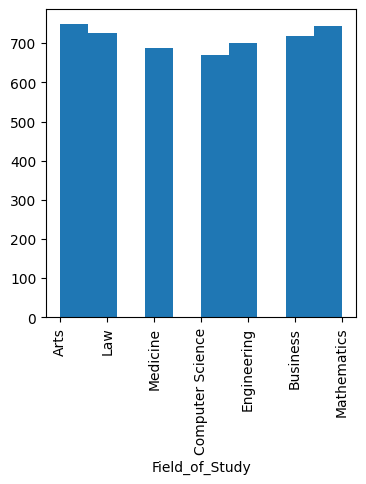

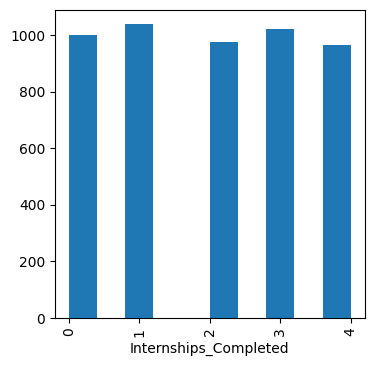

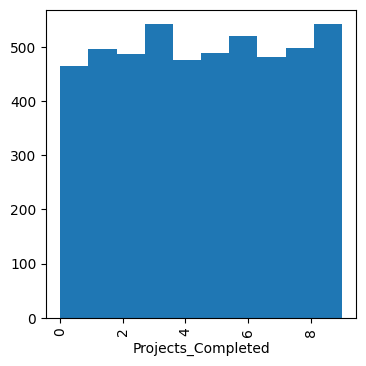

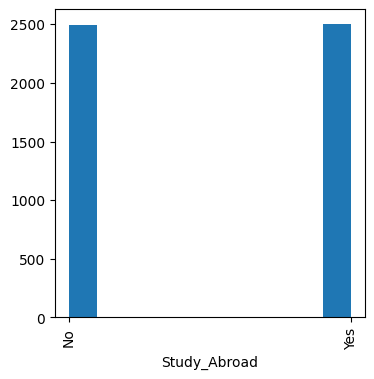

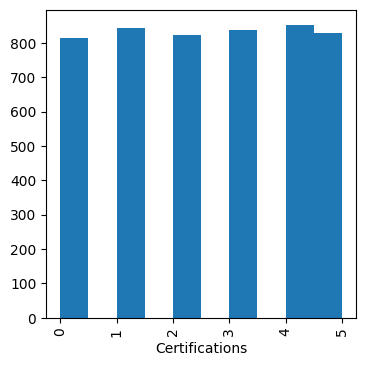

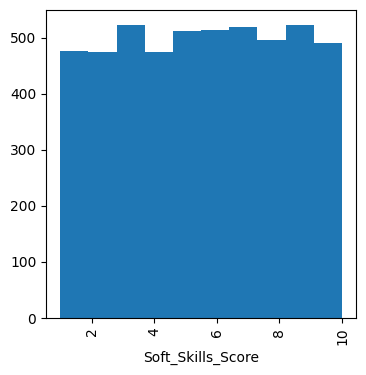

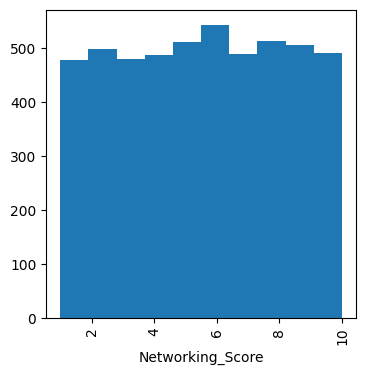

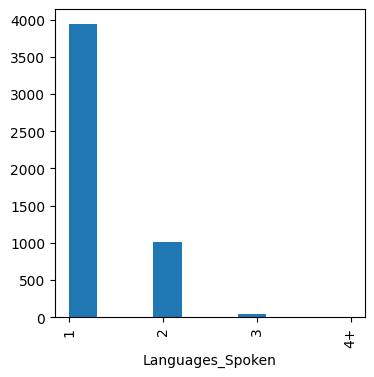

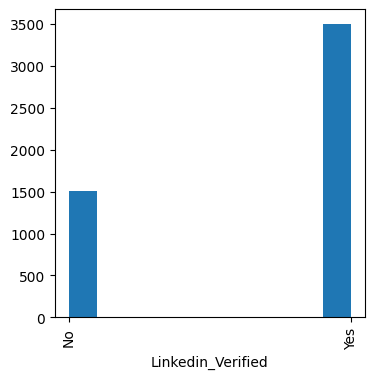

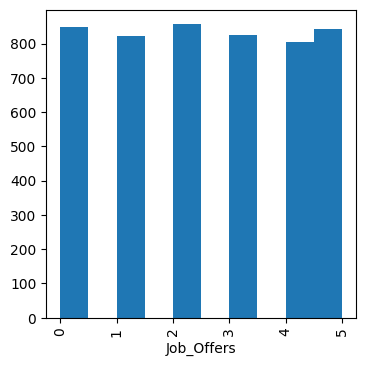

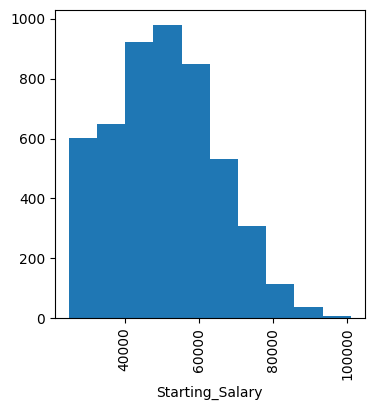

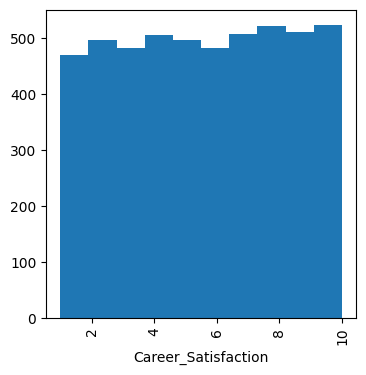

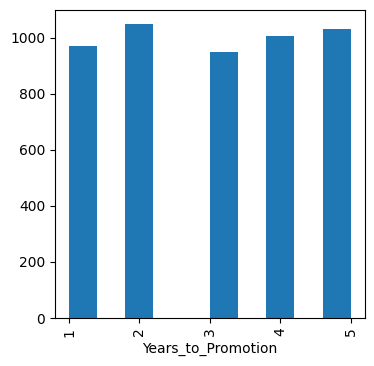

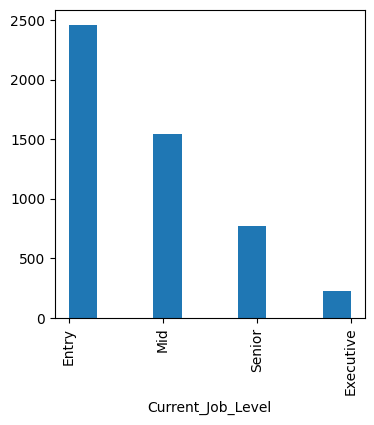

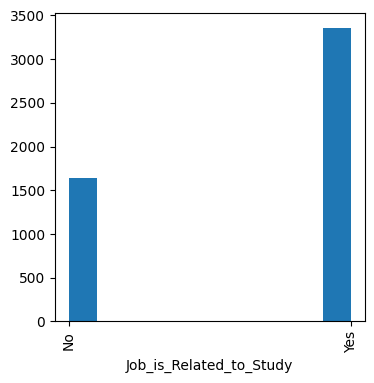

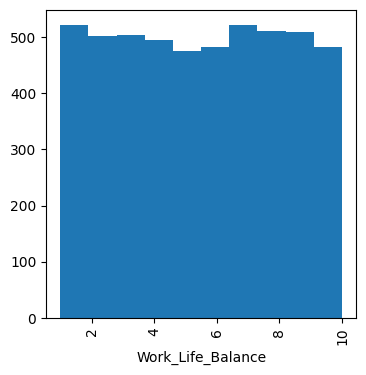

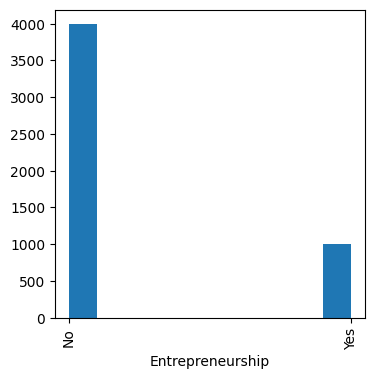

In [442]:
for col in df.columns:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.xticks(rotation=90)
  plt.show()

In [443]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,23.44,3.00,1253.83,504.34,3.02,1.98,4.56,2.51,5.55,5.54,2.49,50563.54,5.58,3.02,5.48
std,3.47,0.58,203.23,291.06,0.58,1.41,2.87,1.70,2.85,2.85,1.71,14494.96,2.87,1.42,2.88
min,18.00,2.00,900.00,1.00,2.00,0.00,0.00,0.00,1.00,1.00,0.00,25000.00,1.00,1.00,1.00
25%,20.00,2.50,1076.00,256.00,2.52,1.00,2.00,1.00,3.00,3.00,1.00,40200.00,3.00,2.00,3.00
50%,23.00,2.99,1257.00,501.50,3.03,2.00,5.00,3.00,6.00,6.00,2.00,50300.00,6.00,3.00,6.00
75%,26.00,3.50,1432.00,759.00,3.51,3.00,7.00,4.00,8.00,8.00,4.00,60500.00,8.00,4.00,8.00
max,29.00,4.00,1600.00,1000.00,4.00,4.00,9.00,5.00,10.00,10.00,5.00,101000.00,10.00,5.00,10.00


The delta between max starting salary and the 75% quantile is almost as high as the mean.

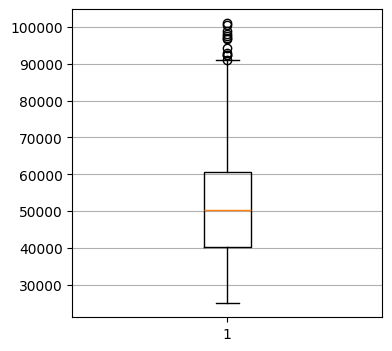

In [444]:
plt.boxplot(df['Starting_Salary'])
plt.grid(axis='y')
plt.show()

There doesn't appear to be any extreme values that deviate too far from IQR.

# Feature Selection

<Axes: >

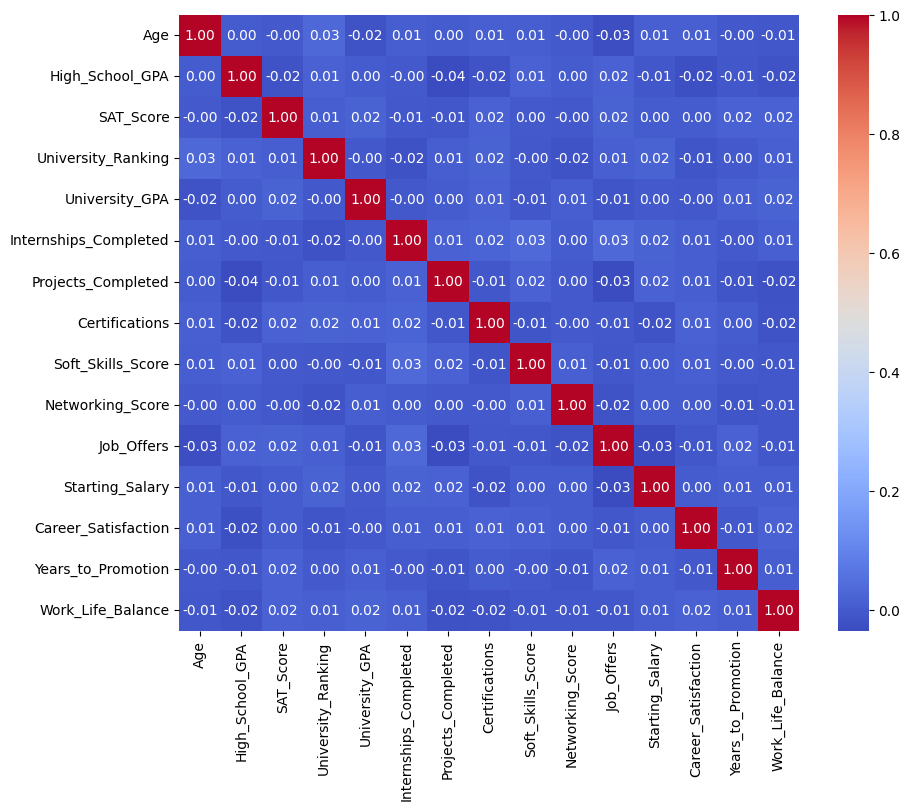

In [445]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), fmt='.2f', annot=True, cmap='coolwarm')

Since there are no strong correlations between career satisfaction and other variables, we can only perform feature selection with logic.\
The following variables seem logical to include in modeling for determining career satisfaction:

* Age
* Gender
* Ethnicity
* Marital_Status
* Starting_Salary
* Career_Satisfaction
* Years_to_Promotion
* Current_Job_Level
* Job_is_Related_to_Study
* Work_Life_Balance

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Ethnicity                5000 non-null   object 
 3   Marital_Status           5000 non-null   object 
 4   High_School_GPA          5000 non-null   float64
 5   SAT_Score                5000 non-null   int64  
 6   Activities               5000 non-null   object 
 7   University_Ranking       5000 non-null   int64  
 8   University_GPA           5000 non-null   float64
 9   Field_of_Study           5000 non-null   object 
 10  Internships_Completed    5000 non-null   int64  
 11  Projects_Completed       5000 non-null   int64  
 12  Study_Abroad             5000 non-null   object 
 13  Certifications           5000 non-null   int64  
 14  Soft_Skills_Score       

In [447]:
df = df.iloc[:, [0,1,2,3,19,20,21,22,23,24]].reset_index(drop=True)
df.head()

,Age,Gender,Ethnicity,Marital_Status,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Job_is_Related_to_Study,Work_Life_Balance
0,24,Male,White,Single,27200,4,5,Entry,No,7
1,21,Other,White,Single,25000,1,1,Mid,Yes,7
2,28,Female,White,Single,42400,9,3,Entry,Yes,7
3,25,Male,White,Married,57400,7,5,Mid,No,5
4,22,Male,White,Single,47600,9,5,Entry,Yes,2


# EDA

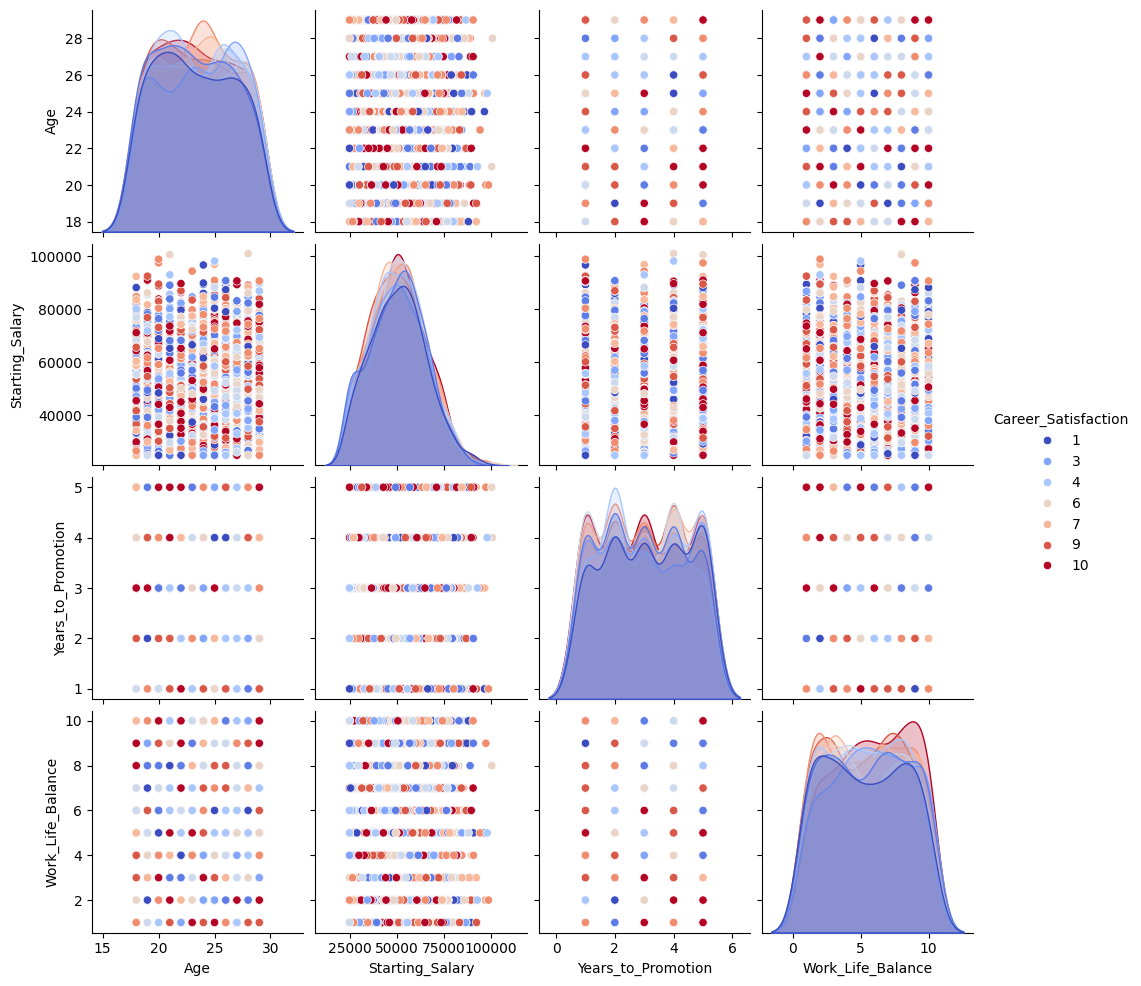

In [448]:
sns.pairplot(df, hue='Career_Satisfaction', palette='coolwarm')

There are no discernible relationships between any variables and career satisfaction.

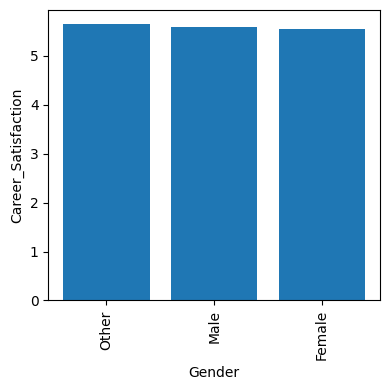

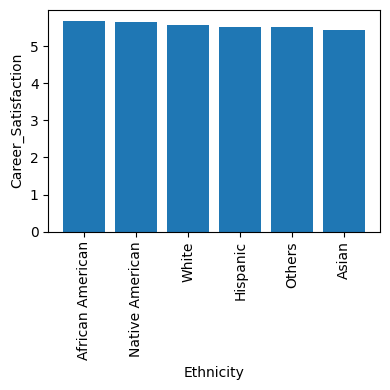

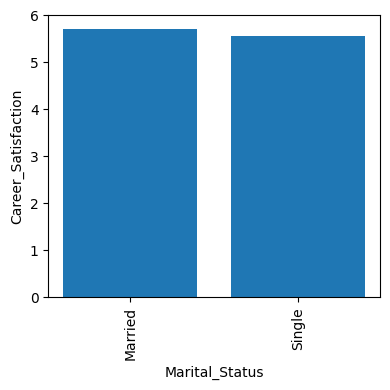

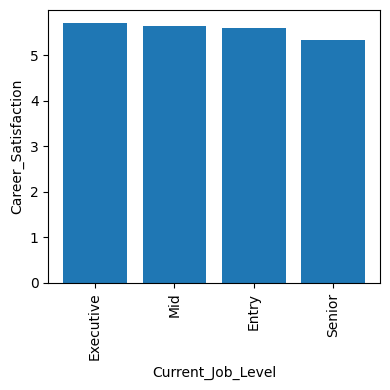

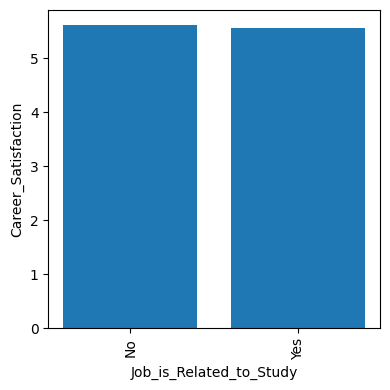

In [449]:
category = df.select_dtypes('object').columns.tolist()
for col in category:
    if col != 'satisfied':
        group = df[[col, 'Career_Satisfaction']].groupby([col], as_index=False).mean().sort_values('Career_Satisfaction',ascending=False)

        plt.bar(group[col], group['Career_Satisfaction'])
        plt.ylabel('Career_Satisfaction')
        plt.xlabel(f'{col}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

People at 'senior' job levels have the lowest average career satisfaction score, although only slightly lower than all other job levels.

#Feature engineering

##Creating proxy label for target

In [450]:
df["TGT_Satisfied"] = df["Career_Satisfaction"] >= 5
df.head()

,Age,Gender,Ethnicity,Marital_Status,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Job_is_Related_to_Study,Work_Life_Balance,TGT_Satisfied
0,24,Male,White,Single,27200,4,5,Entry,No,7,False
1,21,Other,White,Single,25000,1,1,Mid,Yes,7,False
2,28,Female,White,Single,42400,9,3,Entry,Yes,7,True
3,25,Male,White,Married,57400,7,5,Mid,No,5,True
4,22,Male,White,Single,47600,9,5,Entry,Yes,2,True


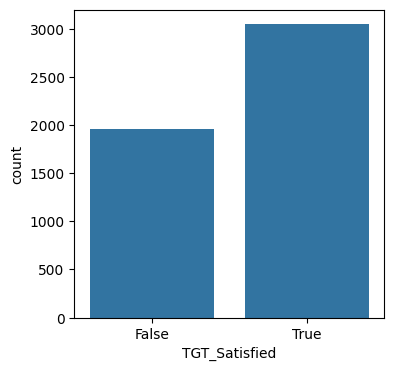

In [451]:
sns.countplot(x='TGT_Satisfied', data=df)
plt.show()

There is much more people who are satisfied with their careers than people who aren't. This dataset will have to be balanced.

## Oversampling

In [452]:
from imblearn.over_sampling import SMOTENC

X = df.drop('TGT_Satisfied', axis=1)
y = df['TGT_Satisfied']

category = X.select_dtypes(['object']).columns.tolist()
category = [X.columns.get_loc(col) for col in category]

smote_nc = SMOTENC(categorical_features=category, random_state=123)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='TGT_Satisfied')

df = pd.concat([X_resampled, y_resampled], axis=1)

In [453]:
#verifying SMOTENC didn't wrongly oversample career satisfaction variable
df[(df['TGT_Satisfied']==True)&(df['Career_Satisfaction']<5)]

,Age,Gender,Ethnicity,Marital_Status,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Job_is_Related_to_Study,Work_Life_Balance,TGT_Satisfied


In [454]:
print(df.duplicated().sum())

32


In [455]:
df.drop_duplicates(inplace=True)
df.drop(columns=['Career_Satisfaction'], inplace=True) #removing original feature to prevent target leaking
df.shape

(6058, 10)

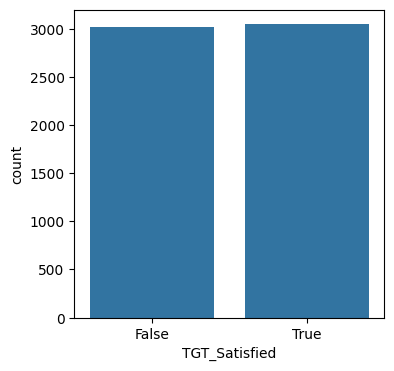

In [456]:
sns.countplot(x='TGT_Satisfied', data=df)
plt.show()

##Scaling

In [457]:
df.select_dtypes(['number']).describe()

,Age,Starting_Salary,Years_to_Promotion,Work_Life_Balance
count,6058.00,6058.00,6058.00,6058.00
mean,23.34,50677.42,2.94,5.40
std,3.39,14610.18,1.38,2.82
min,18.00,25000.00,1.00,1.00
25%,20.00,40200.00,2.00,3.00
50%,23.00,50600.00,3.00,5.00
75%,26.00,60700.00,4.00,8.00
max,29.00,101000.00,5.00,10.00


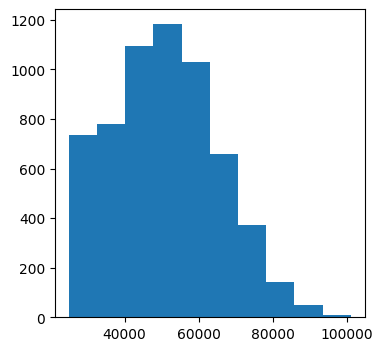

In [458]:
plt.hist(df['Starting_Salary'])
plt.show()

linear scaling works well for age, career satisfaction, years to promotion and work life balance as we know the lower and upper bounds.\
Z-score scaling works better for starting salary as it has somewhat of a normal distribution, log transformation would be too extreme.

In [459]:
linear = df.select_dtypes(['number']).columns.tolist()
linear.remove('Starting_Salary')

In [460]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(df[linear])
df[['Age_scaled','Years_to_Promotion_scaled','Work_Life_Balance_scaled']] = scaled

In [461]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Starting_Salary_scaled'] = scaler.fit_transform(df[['Starting_Salary']])

In [462]:
df.describe()

,Age,Starting_Salary,Years_to_Promotion,Work_Life_Balance,Age_scaled,Years_to_Promotion_scaled,Work_Life_Balance_scaled,Starting_Salary_scaled
count,6058.00,6058.00,6058.00,6058.00,6058.00,6058.00,6058.00,6058.00
mean,23.34,50677.42,2.94,5.40,0.49,0.49,0.49,-0.00
std,3.39,14610.18,1.38,2.82,0.31,0.35,0.31,1.00
min,18.00,25000.00,1.00,1.00,0.00,0.00,0.00,-1.76
25%,20.00,40200.00,2.00,3.00,0.18,0.25,0.22,-0.72
50%,23.00,50600.00,3.00,5.00,0.45,0.50,0.44,-0.01
75%,26.00,60700.00,4.00,8.00,0.73,0.75,0.78,0.69
max,29.00,101000.00,5.00,10.00,1.00,1.00,1.00,3.44


## One-hot Encoding

In [463]:
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['Gender',
 'Ethnicity',
 'Marital_Status',
 'Current_Job_Level',
 'Job_is_Related_to_Study']

In [464]:
df = pd.get_dummies(df,columns= cat_cols)

In [465]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Starting_Salary,Years_to_Promotion,Work_Life_Balance,TGT_Satisfied,Age_scaled,Years_to_Promotion_scaled,Work_Life_Balance_scaled,Starting_Salary_scaled,Gender_Female,Gender_Male,Gender_Other,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_Others,Ethnicity_White,Marital_Status_Married,Marital_Status_Single,Current_Job_Level_Entry,Current_Job_Level_Executive,Current_Job_Level_Mid,Current_Job_Level_Senior,Job_is_Related_to_Study_No,Job_is_Related_to_Study_Yes
0,24,27200,5,7,False,0.55,1.00,0.67,-1.61,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False
1,21,25000,1,7,False,0.27,0.00,0.67,-1.76,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True
2,28,42400,3,7,True,0.91,0.50,0.67,-0.57,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True
3,25,57400,5,5,True,0.64,1.00,0.44,0.46,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False
4,22,47600,5,2,True,0.36,1.00,0.11,-0.21,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True


#Exporting cleaned dataset for modeling

In [466]:
df.to_csv('cleaned_data.csv',index=False)